## Description: This program detects if an individual has Parkinson's disease

Based on [Computer Science video](https://www.youtube.com/watch?v=e0iiV9eCFQc)
Dataset: [parkinson.data](https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/)

More about Parkinson's disease: [Mayo Clinic](https://www.mayoclinic.org/diseases-conditions/parkinsons-disease/symptoms-causes/syc-20376055)

In [0]:
# Get the dependencies
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Load the data to a dataframe
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')
df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  ...   spread2        D2       PPE
0  phon_R01_S01_1      119.992       157.302  ...  0.266482  2.301442  0.284654
1  phon_R01_S01_2      122.400       148.650  ...  0.335590  2.486855  0.368674
2  phon_R01_S01_3      116.682       131.111  ...  0.311173  2.342259  0.332634
3  phon_R01_S01_4      116.676       137.871  ...  0.334147  2.405554  0.368975
4  phon_R01_S01_5      116.014       141.781  ...  0.234513  2.332180  0.410335

[5 rows x 24 columns]

In [26]:
# Check for missing values
df.isnull().values.any()

False

In [27]:
# Get the number of rows and columns in the data set
df.shape

(195, 24)

In [28]:
# Get the target count (1: have the disease, 0: do not have the disease)
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [29]:
percent_has_disease = 147/(147+48)*100
percent_dont_have_disease = 48/(147+48)*100

print('If I guess the individual did not have Parkinsons disease, I would be correct', percent_dont_have_disease, '% of the time.')
print('If I guess the individual has Parkinsons disease, I would be correct', percent_has_disease, '% of the time.')

If I guess the individual did not have Parkinsons disease, I would be correct 24.615384615384617 % of the time.
If I guess the individual has Parkinsons disease, I would be correct 75.38461538461539 % of the time.


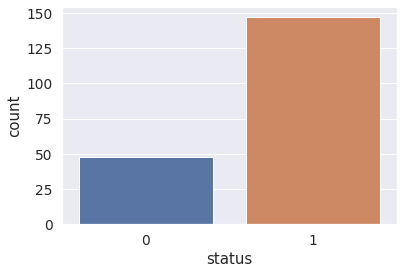

In [30]:
# Visualize the count
sns.countplot(df['status'])

In [31]:
# Get the data types
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

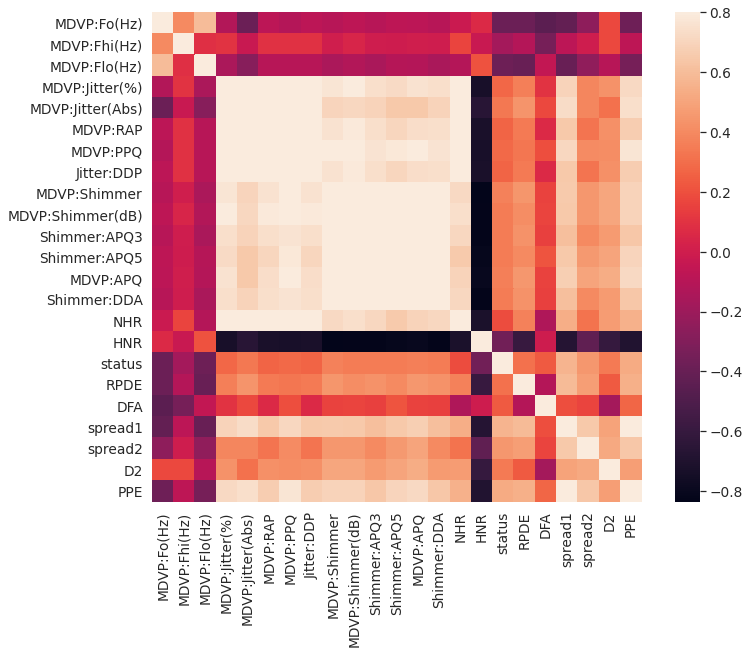

In [32]:
# Correlation matrix
correlation_matrix = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(correlation_matrix, vmax=.8, square=True)

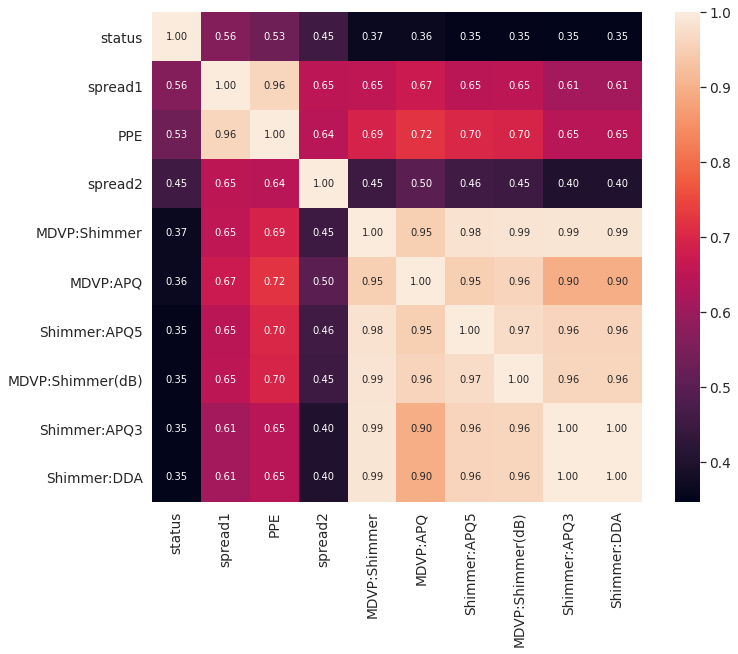

In [33]:
# Status (has or not disease) correlation matrix
k = 10 # number of variables for heatmap
cols = correlation_matrix.nlargest(k, 'status')['status'].index
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize=(12,9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [0]:
# Create the feature data set
X = df.drop(['name', 'status'], 1)
X = np.array(X)

# Create the target data set
y = np.array(df['status'])

In [0]:
# Split the data into 80% training and 20% testing data sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [0]:
# Transform the feature data to be values between 0 an 1
sc = MinMaxScaler(feature_range=(0,1))
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [0]:
# Create the XGBClassifier
model = XGBClassifier().fit(x_train, y_train)

In [38]:
# Get the models predictions
predictions = model.predict(x_test)
predictions

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1])

In [39]:
y_test

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [40]:
# Get the models accuracy, precision, recall, and the f1-score
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.93      0.97        30

    accuracy                           0.95        39
   macro avg       0.91      0.97      0.93        39
weighted avg       0.96      0.95      0.95        39

